# Re-program by Dipankar Bhowmik
##Prediction
### Date: 17-09-2020

In [1]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive # Downloading Datasets into Google Drive via Google Colab
import tensorflow as tf # Software library 
from tensorflow import keras # TensorFlow's high-level API for building and training deep learning models.
from tensorflow.keras.utils import plot_model # Converts a Keras model to dot format and save to a file
from keras.models import load_model # Save and load Keras models
import random # It implements pseudo-random number generators for various distributions


#Functions to save objects for future usage and repossess
#https://stackoverflow.com/questions/1253528/is-there-an-easy-way-to-pickle-a-python-function-or-otherwise-serialize-its-cod
import pickle
def transmit(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"), protocol=4)
def receive(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

In [ ]:
print(tf.__version__)

2.3.0


In [2]:
drive.mount('/content/drive') # for mounting Google Drive files 

Mounted at /content/drive


In [7]:
# Downloading the processed data
train_1k_num = receive("drive/My Drive/Colab Notebooks/train_1k_num")
test_1k_num = receive("drive/My Drive/Colab Notebooks/test_1k_num")
dev_1k_num = receive('drive/My Drive/Colab Notebooks/dev_1k_num')

In [4]:
# Downloading the best model
model_30_30_1k_pad550 = load_model('drive/My Drive/Colab Notebooks/model_30_30_1k_class_pad550')

In [5]:
model_30_30_1k_pad550.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 550, 24)]    0                                            
__________________________________________________________________________________________________
con1 (Conv1D)                   (None, 550, 30)      750         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 550, 30)      120         con1[0][0]                       
__________________________________________________________________________________________________
tf_op_layer_Relu_4 (TensorFlowO (None, 550, 30)      0           batch_normalization_4[0][0]      
_______________________________________________________________________________________

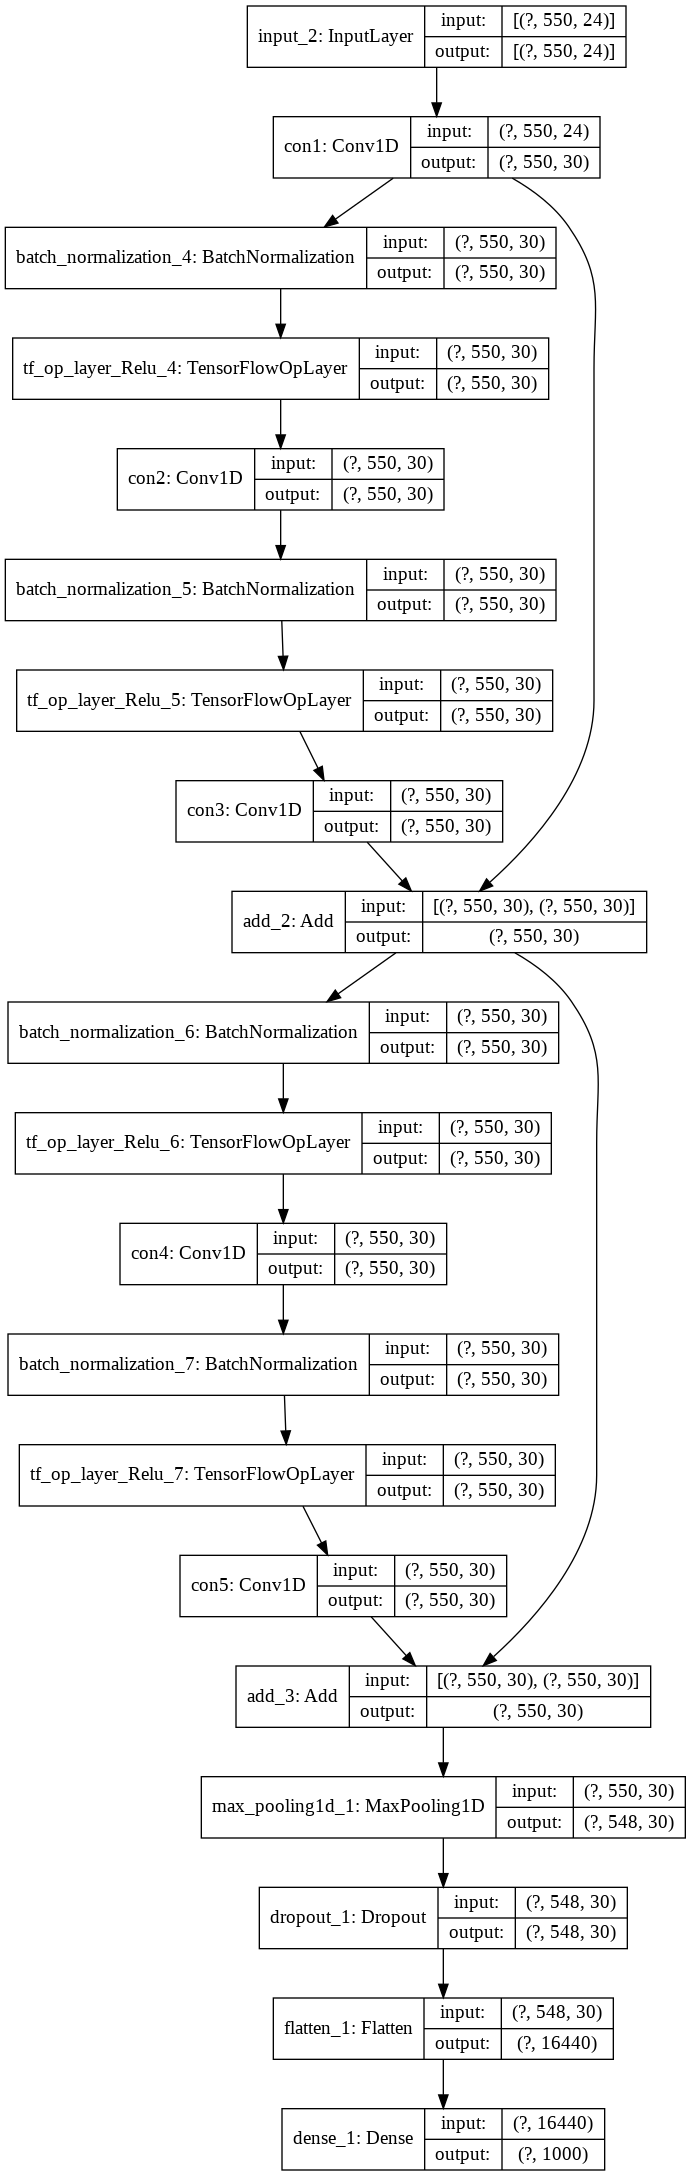

In [ ]:
keras.utils.plot_model(model_30_30_1k_pad550, 'model_30_30_1k_pad550.png', show_shapes=True)

In [8]:
# Downloading the token
token_vec = receive('drive/My Drive/Colab Notebooks/token_vec')

In [9]:
# Taking sample from train
train_1k_num.values[10000]

array([4, 'Bac_transf', 'U5MSR3_CLOSA/26-214',
       'KRFIDIICSLIALIVLMPILIIVAILIKIESSGPIIFCQNRVGKGGAIFKIYKFRSMVTNAEALKEHLAHENERSGPMFKIKNDPRVTKVGRIIRRTSIDELPQLLNILKGDMSIVGPRPSLPKEVEQFEEWMLKRLTVKPGLTCYWQVSGRNDIEFNEWMELDIKYVNERNVGIDILLILKTFSVLFG'],
      dtype=object)

So above sequence is from 'Bac_transf' family

In [10]:
# Convert the sequence into vector for further prediction testing
token_train_one_sample_1k = token_vec.texts_to_sequences(['KRFIDIICSLIALIVLMPILIIVAILIKIESSGPIIFCQNRVGKGGAIFKIYKFRSMVTNAEALKEHLAHENERSGPMFKIKNDPRVTKVGRIIRRTSIDELPQLLNILKGDMSIVGPRPSLPKEVEQFEEWMLKRLTVKPGLTCYWQVSGRNDIEFNEWMELDIKYVNERNVGIDILLILKTFSVLFG'])
print(token_train_one_sample_1k)

[[11, 8, 13, 5, 9, 5, 5, 19, 7, 1, 5, 2, 1, 5, 4, 1, 17, 12, 5, 1, 5, 5, 4, 2, 5, 1, 5, 11, 5, 6, 7, 7, 3, 12, 5, 5, 13, 19, 15, 14, 8, 4, 3, 11, 3, 3, 2, 5, 13, 11, 5, 16, 11, 13, 8, 7, 17, 4, 10, 14, 2, 6, 2, 1, 11, 6, 18, 1, 2, 18, 6, 14, 6, 8, 7, 3, 12, 17, 13, 11, 5, 11, 14, 9, 12, 8, 4, 10, 11, 4, 3, 8, 5, 5, 8, 8, 10, 7, 5, 9, 6, 1, 12, 15, 1, 1, 14, 5, 1, 11, 3, 9, 17, 7, 5, 4, 3, 12, 8, 12, 7, 1, 12, 11, 6, 4, 6, 15, 13, 6, 6, 20, 17, 1, 11, 8, 1, 10, 4, 11, 12, 3, 1, 10, 19, 16, 20, 15, 4, 7, 3, 8, 14, 9, 5, 6, 13, 14, 6, 20, 17, 6, 1, 9, 5, 11, 16, 4, 14, 6, 8, 14, 4, 3, 5, 9, 5, 1, 1, 5, 1, 11, 10, 13, 7, 4, 1, 13, 3]]


In [13]:
# below code will put padding havind maximum length 550
def padding2(pad_seq):
  pad_data = tf.keras.preprocessing.sequence.pad_sequences(pad_seq, maxlen=550, dtype='int32', padding='post', truncating='post', value=0.0)
  return pad_data

In [14]:
# Below code will pad and convert the sample to binary class
X_seq = padding2(token_train_one_sample_1k)
X = tf.keras.utils.to_categorical(X_seq,num_classes=24) # It is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector

In [15]:
X.shape

(1, 550, 24)

In [16]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
# https://www.tensorflow.org/guide/keras/train_and_evaluate

predictions = model_30_30_1k_pad550.predict(X)
print("predictions shape:", predictions.shape)

predictions shape: (1, 1000)


In [18]:
print(predictions) 

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 7.0061300e-37 0.0000000e+00
  1.0835210e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.6392510e-36
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.7229473e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  8.5325355e-38 3.8827424e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.1898647e-38 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000

In [19]:
# predict the class
np.argmax(predictions)

4

In [20]:
# According to class (family_accession),it will show the family_id (family)
# https://stackoverflow.com/a/17071908
train_1k_num.loc[train_1k_num['family_accession'] == 4]

,family_accession,family_id,sequence_name,sequence
8862,4,Bac_transf,D3EZT3_CONWI/319-507,KRTFDLIGSLLLLTLLSPLLLTLSLAVKLSSRGPVFYRSTRPGIGG...
8863,4,Bac_transf,R7G7I6_9FIRM/7-186,KRVLDFFMSLLGIVVLSPIFLILAIIIKLTSPGPILFKQKRVGKNK...
8864,4,Bac_transf,R6W5B9_9BACT/7-183,KRFFDFWIALIALICISPILIVVTIWLHFANKGAGAFFFQERPGKD...
8865,4,Bac_transf,F8HZ20_WEIKK/17-206,KRCFDLVCSTLGLLVLSPIFLIIMVAIKFEDPKGYIFFSQMRVGKN...
8866,4,Bac_transf,D2PYY8_KRIFD/316-504,KSIFDRVMALVLLVVALPLLVGIALAVRLTSSGPVLFKQRRVGRGN...
...,...,...,...,...
10385,4,Bac_transf,W8T6C1_PEPAC/1-180,MFDFVFALILMPLILPLIVLCGFLIKLEDRGPVFYLGKRLGKDKKI...
10386,4,Bac_transf,Q2NHK8_METST/275-457,KRTFDVLFVVVASIILSPLLVIVAIAIKLTSPGPIIYKQERVGENA...
10387,4,Bac_transf,A4J8Z6_DESRM/27-202,KRPMDFILCLCAIIVLAPVLLVTAVLVRVKLGSPVIFKQKRPGLNE...
10388,4,Bac_transf,H8XT91_FLAIG/273-454,RVFDVFSSLIGLLFLLLLLPFIAILNYFWNKGPLFYKQERVGKNGR...


### So the sample (token_train_one_sample_1k) is from "Bac_transf" family which is same as predicted.